In [16]:
from pathlib import Path
from functools import partial

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

In [3]:
DATA_PATH = Path('train_set')

In [4]:
samples_map: dict[str, list[pd.DataFrame]] = {}
for activity_class_path in DATA_PATH.iterdir():
    activity_class = activity_class_path.stem
    class_samples = []
    for sample_file_path in activity_class_path.glob("*.txt"):
        sample_df = pd.read_csv(sample_file_path, sep="\t")
        class_samples.append(sample_df)
    samples_map[activity_class] = class_samples

print(samples_map.keys())
samples_map

dict_keys(['cycling', 'walking', 'stationary', 'running'])


{'cycling': [       A_X [mg]   A_Y [mg]    A_Z [mg]  G_X [dps]  G_Y [dps]  G_Z [dps]  LABEL
  0    -532.88400  318.54900   800.12800   1.802634  -4.855078   2.753017      4
  1    -545.93270  306.41083   774.30820   0.448732  -3.686064   1.734838      4
  2    -539.57880  319.38440   775.63740   0.008653  -2.680702   1.575050      4
  3    -552.30475  303.36084   742.64910   1.477986  -3.081899   1.915423      4
  4    -544.12060  297.28333   738.11786   1.501972  -3.639454   2.821070      4
  ...         ...        ...         ...        ...        ...        ...    ...
  6235 -309.53860  663.07660  1037.66210  -2.564757   9.977586  10.268719      4
  6236 -448.40780  631.11890   907.92290 -12.675225  10.641989  12.704135      4
  6237 -440.88880  383.20285   684.07870 -20.404827  14.186328   6.076445      4
  6238 -420.07248  345.89163   685.81006 -15.245555   9.438767   5.084689      4
  6239 -497.90646  380.30730   819.06464 -12.288746  10.923522   6.387589      4
  
  [6240 rows x

In [5]:
example_sample = samples_map["walking"][0]
example_sample

A_X [mg]   A_Y [mg]   A_Z [mg]  G_X [dps]  G_Y [dps]  G_Z [dps]  LABEL
0    -880.687000  266.81100  339.52800 -12.288169  27.418379 -16.592915      2
1    -874.098140  273.78918  341.83548 -12.346416  27.006054 -19.315160      2
2    -884.570250  302.53876  359.42860 -14.967258  27.826796 -15.255226      2
3    -927.972050  318.25790  367.64395 -14.670334  28.448778 -18.060198      2
4    -940.796300  339.00632  363.09134 -19.675179  29.170850 -13.871478      2
...          ...        ...        ...        ...        ...        ...    ...
5064 -138.897450  948.98486  424.33752 -64.614456  21.141073   6.576263      2
5065 -105.935220  970.48930  412.36795 -70.575240  20.345997   3.644182      2
5066 -124.619550  892.75300  407.94333 -70.874725  20.337234   4.779649      2
5067 -104.666885  921.05804  385.42758 -76.760730  20.685781   4.121827      2
5068 -135.398820  897.73474  410.94250 -74.529090  19.307625   4.489782      2

[5069 rows x 7 columns]

In [6]:
def plot_for_all_classes(
        plotting_function,
        nrows=1,
        ncols=4,
        figsize=(20, 5),
        sample_index=0,
):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, sharey=True)
    axes: tuple[Axes] = axes.reshape((-1))
    for ax, (class_, samples) in zip(axes, samples_map.items()):
        sample_df = samples[sample_index]
        plotting_function(sample_df.drop(columns="LABEL"), ax=ax)
        ax.set_title(class_)
    return fig, axes

(<Figure size 2000x500 with 4 Axes>,
 array([<Axes: title={'center': 'cycling'}>,
        <Axes: title={'center': 'walking'}>,
        <Axes: title={'center': 'stationary'}>,
        <Axes: title={'center': 'running'}>], dtype=object))

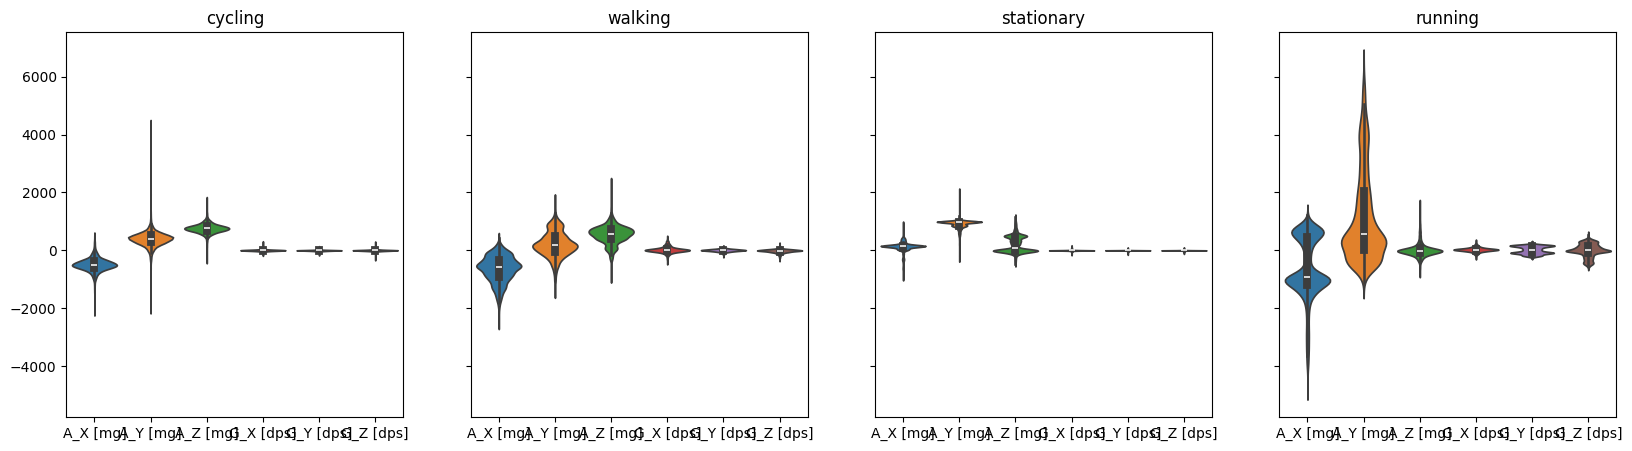

In [7]:
plot_for_all_classes(sns.violinplot)

(<Figure size 2000x500 with 4 Axes>,
 array([<Axes: title={'center': 'cycling'}>,
        <Axes: title={'center': 'walking'}>,
        <Axes: title={'center': 'stationary'}>,
        <Axes: title={'center': 'running'}>], dtype=object))

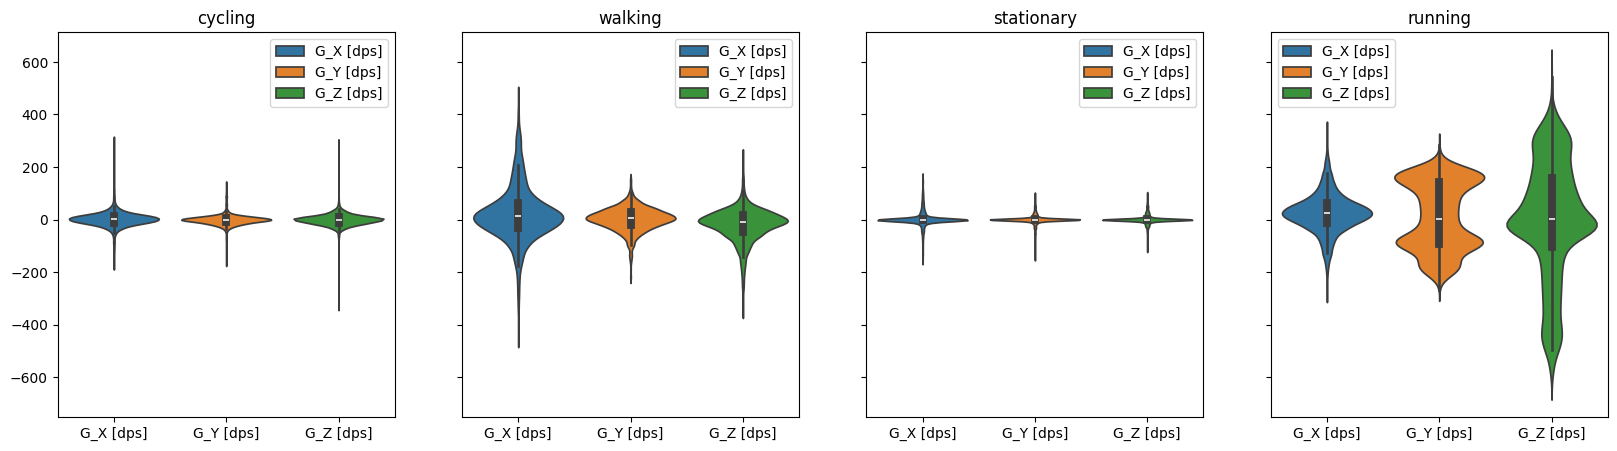

In [28]:
def plot_violin_from_rotation(df: pd.DataFrame, ax=None):
    rotation_df = df.filter(like="G")
    sns.violinplot(rotation_df, ax=ax, legend=True)

plot_for_all_classes(plot_violin_from_rotation)

cycling
walking
stationary
running


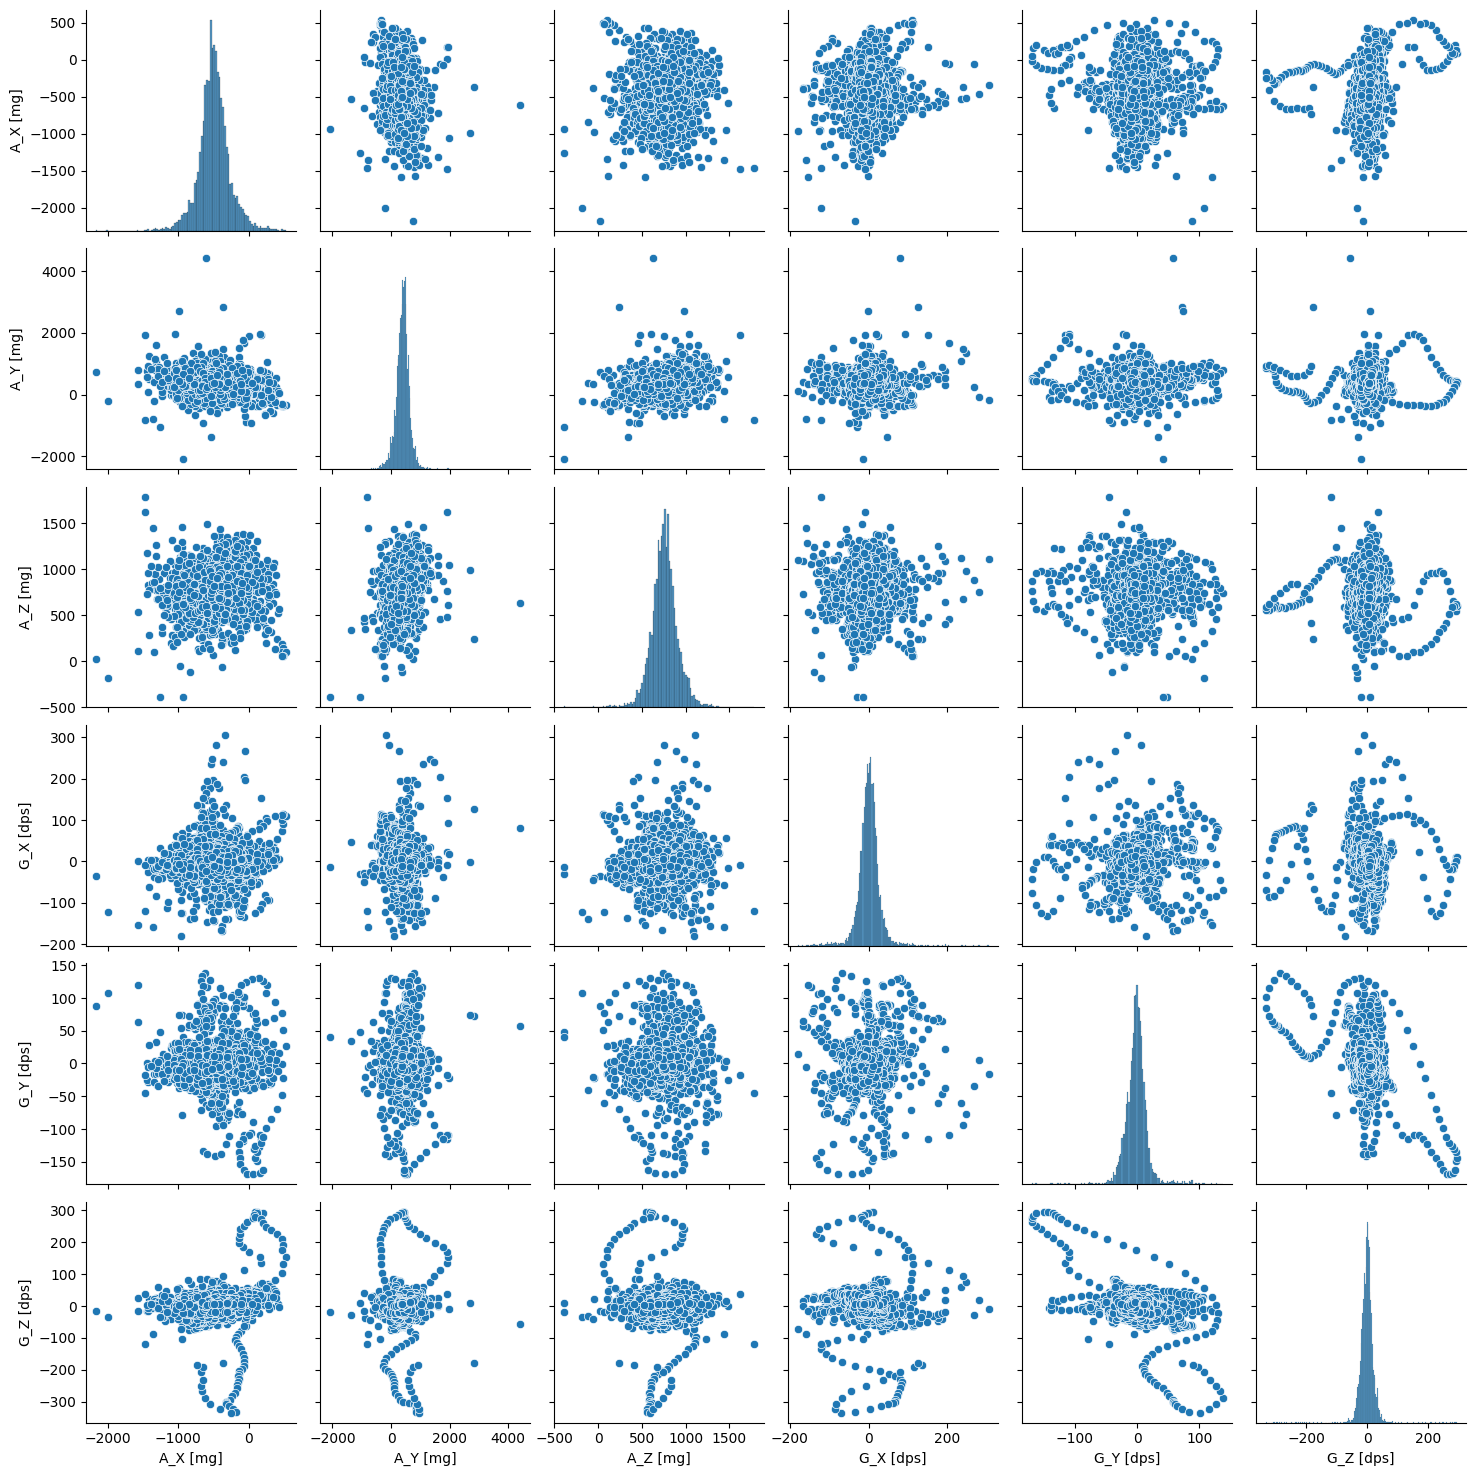

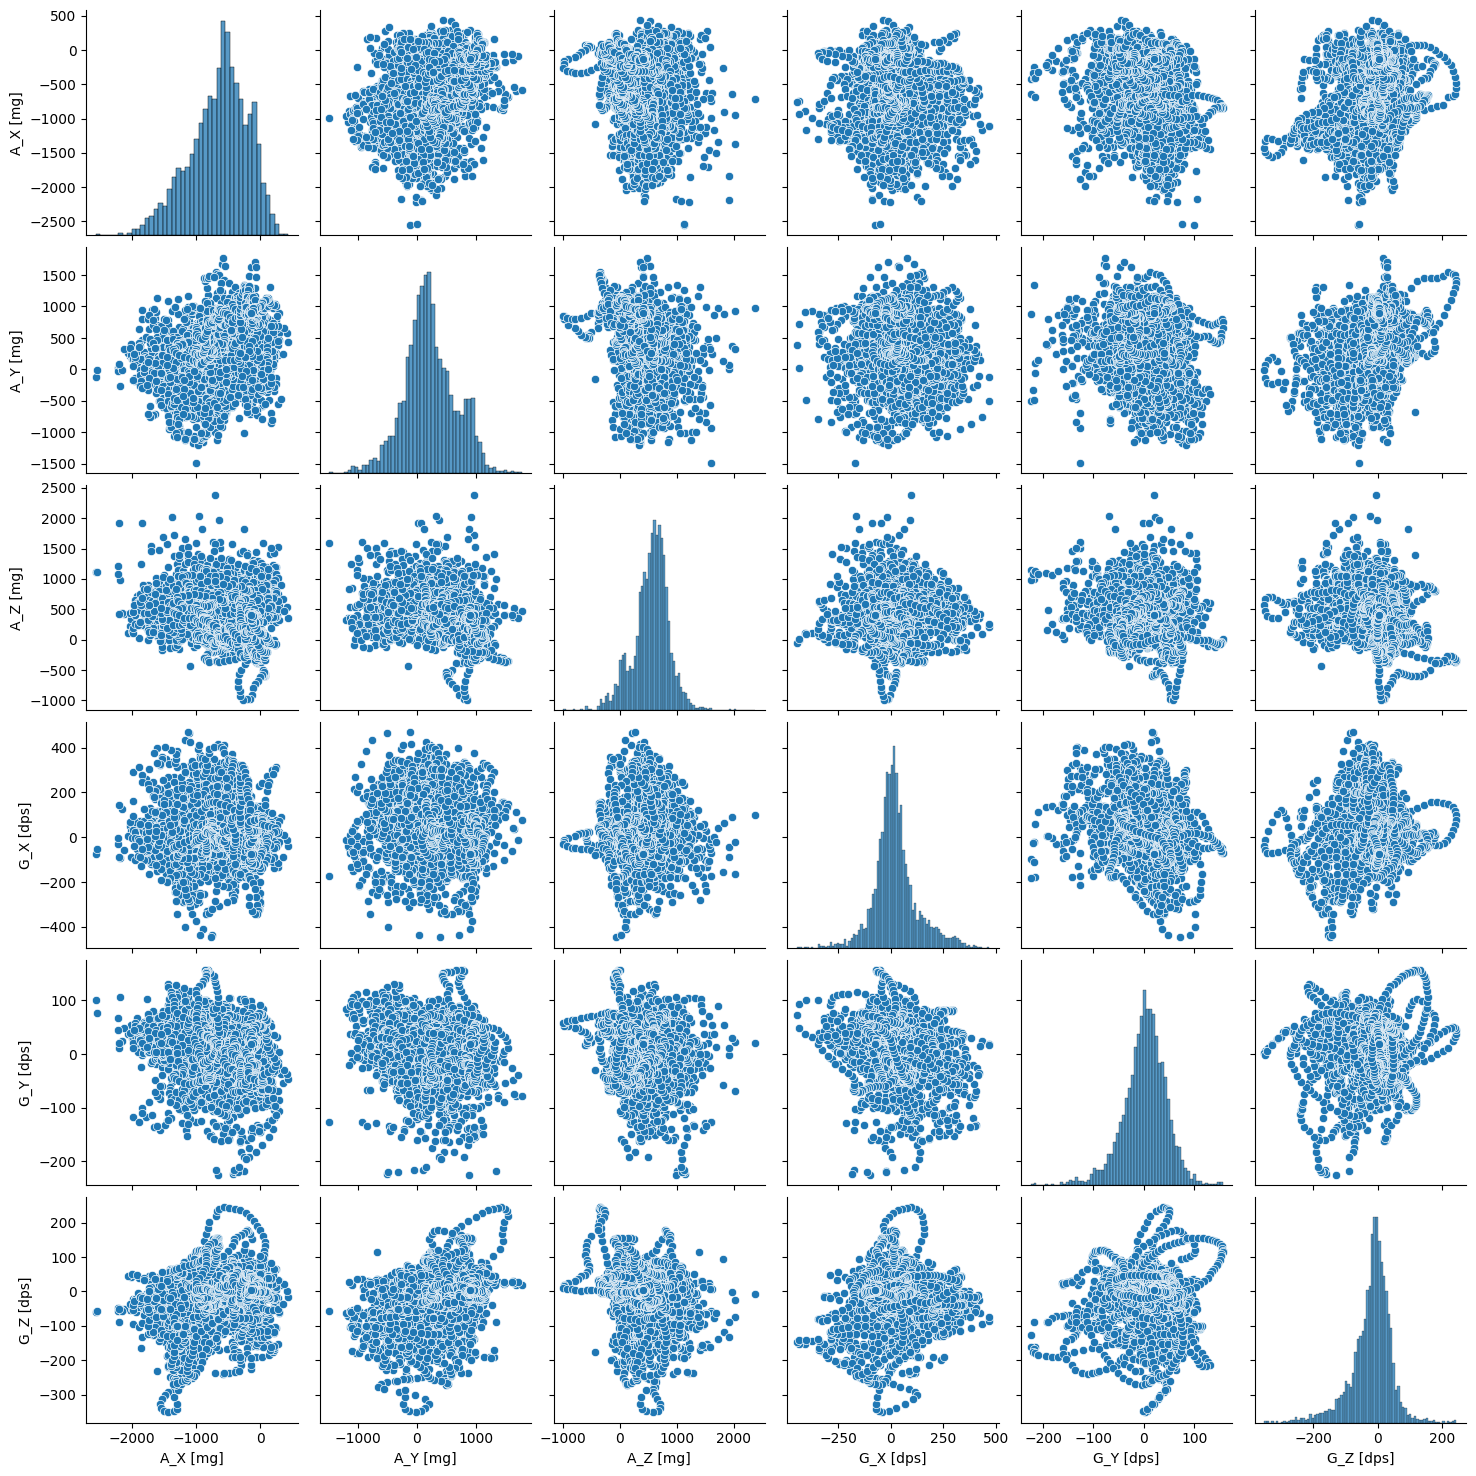

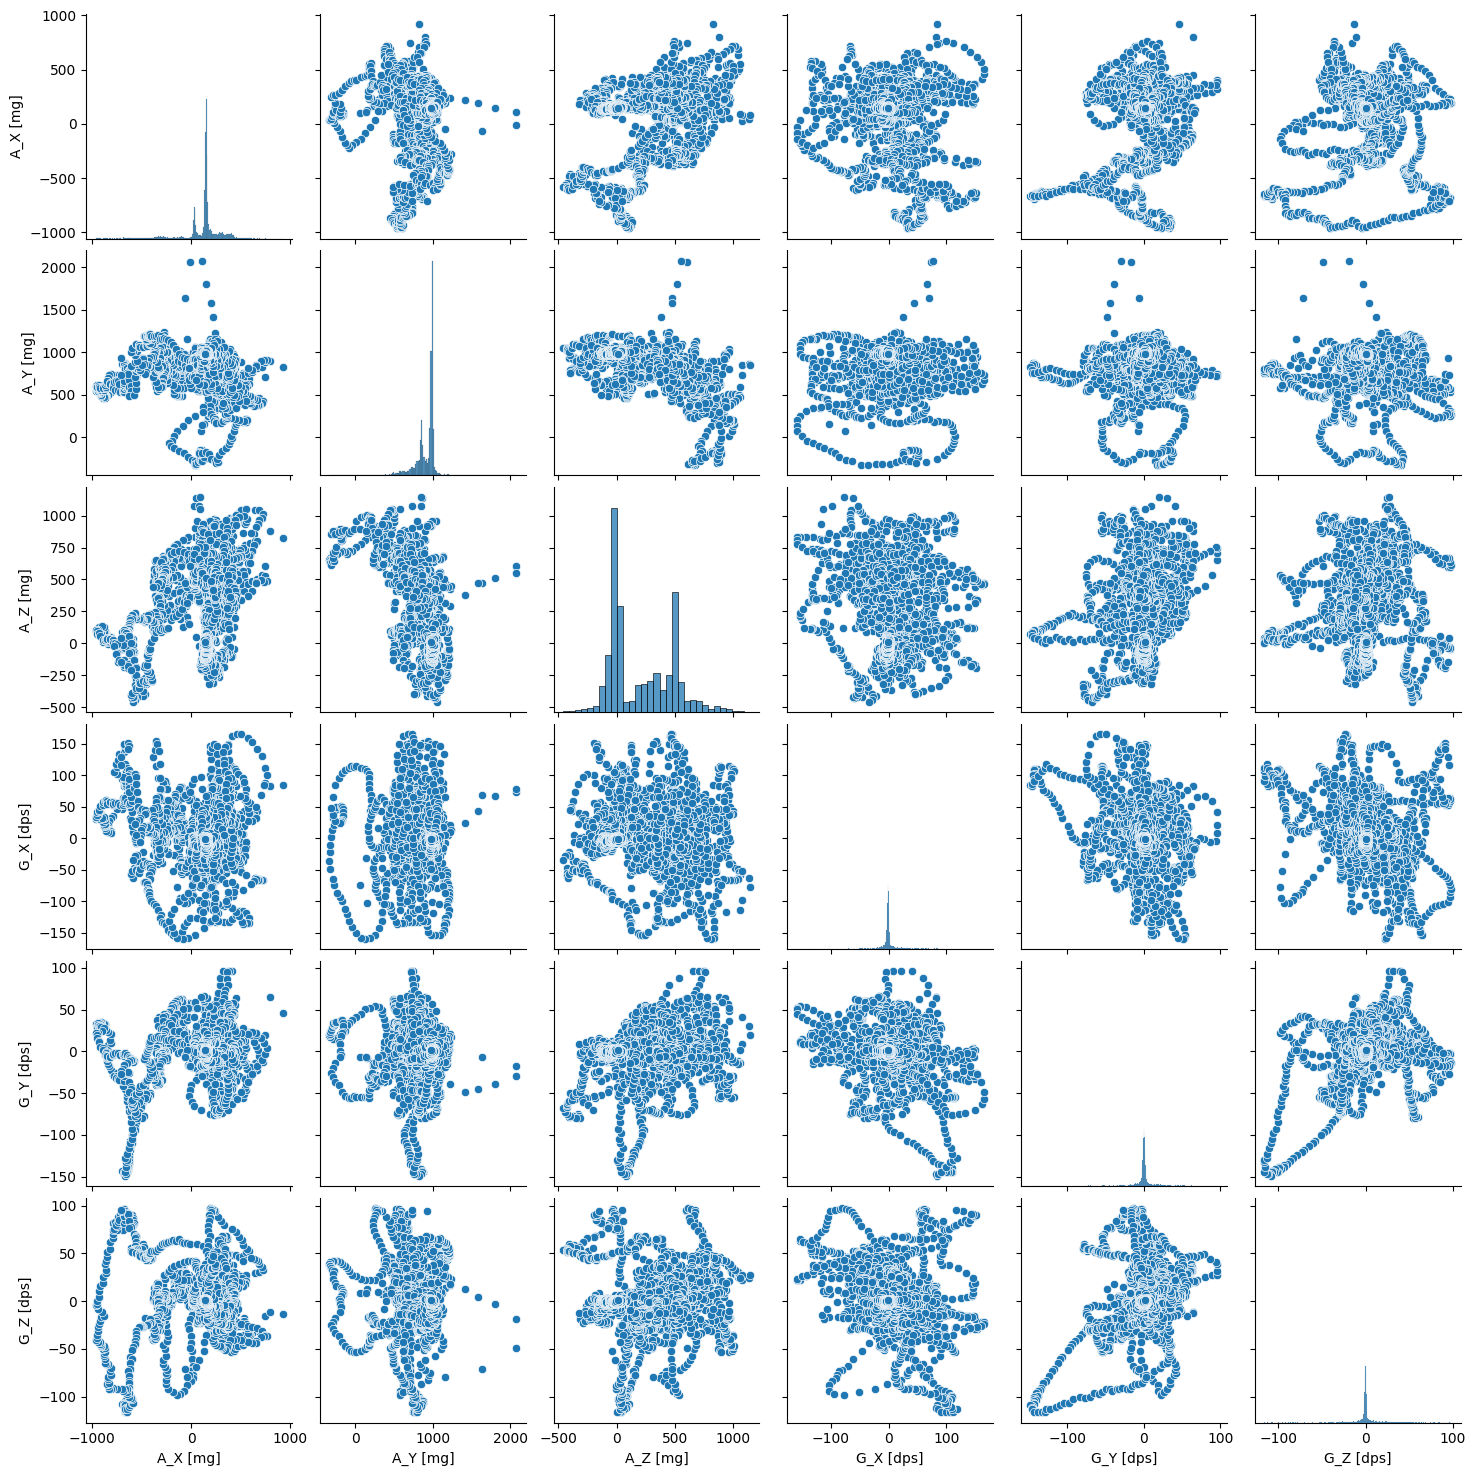

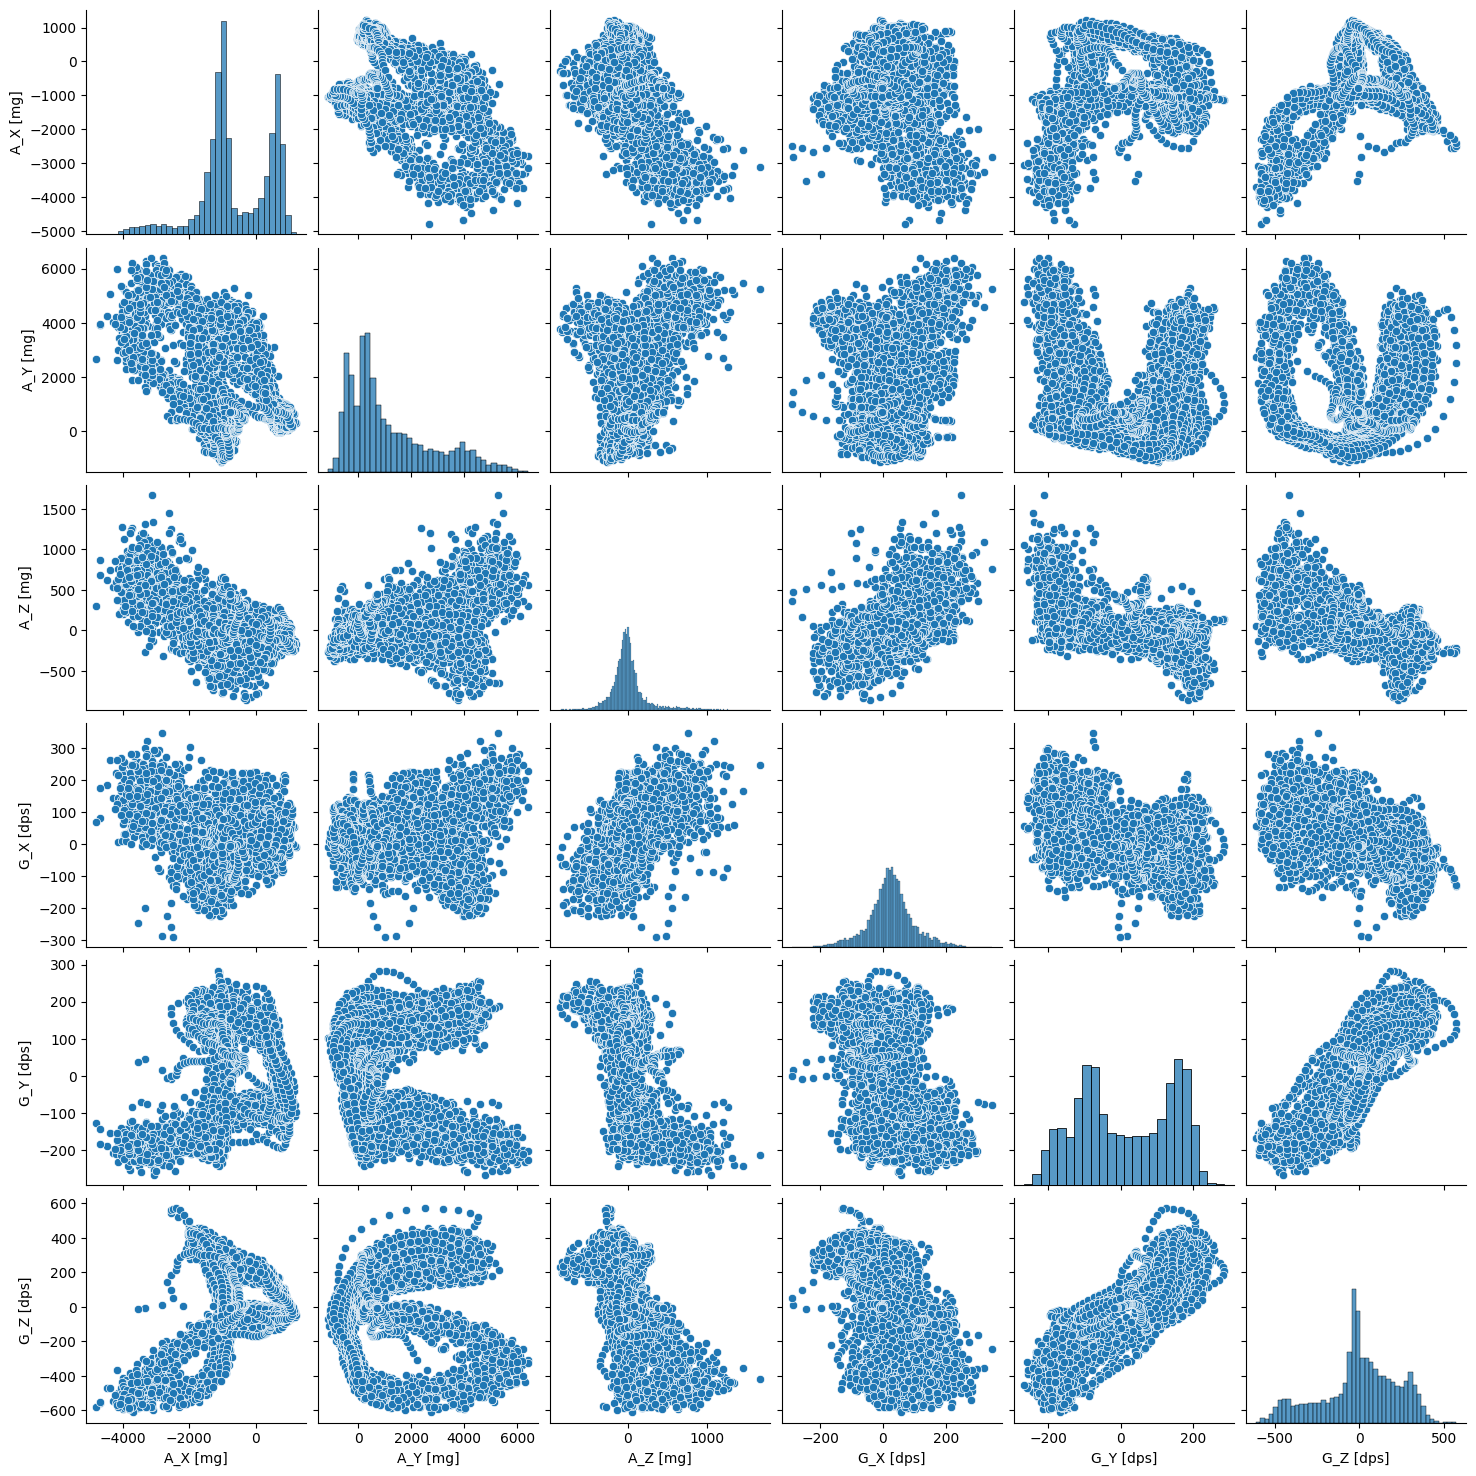

In [8]:
for class_, samples in samples_map.items():
    sample_df = samples[0]
    print(class_)
    sns.pairplot(sample_df.drop(columns="LABEL"))

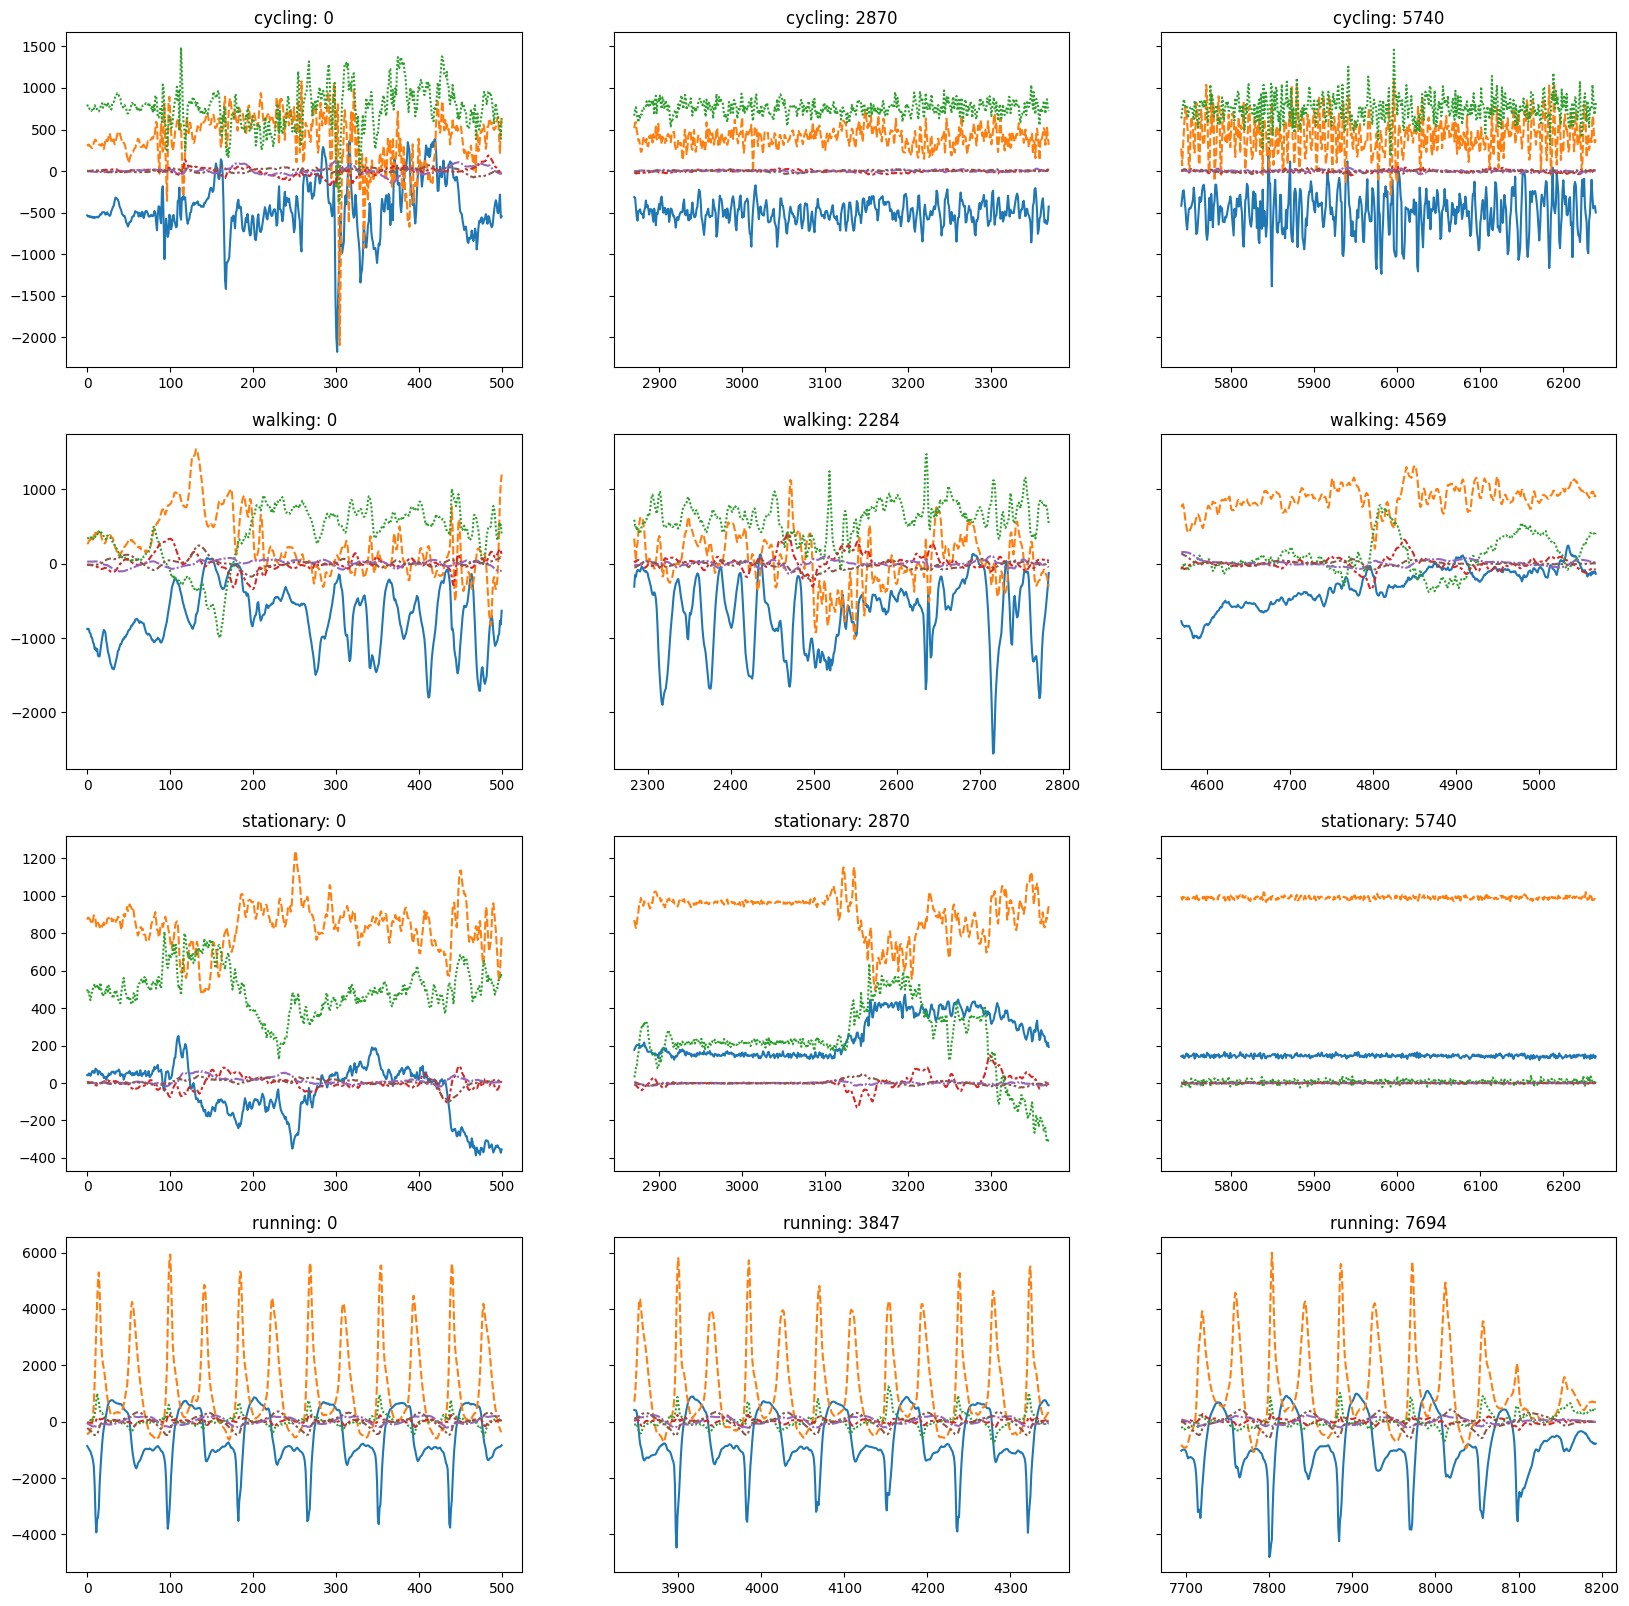

In [17]:
ROWS_TO_PLOT = 500

fig, axes = plt.subplots(4, 3, figsize=(20, 20), sharey="row")
for row_axes, (class_, samples) in zip(axes, samples_map.items()):
    sample_df = samples[0]
    sample_df_rows = sample_df.shape[0] - ROWS_TO_PLOT
    for ax, starting_point in zip(row_axes, (0, sample_df_rows//2, sample_df_rows)):
        sns.lineplot(
            sample_df
            .drop(columns="LABEL")
            .iloc[starting_point:starting_point+ROWS_TO_PLOT],
            ax=ax,
            legend=False,
        )
        ax.set_title(f"{class_}: {starting_point}")

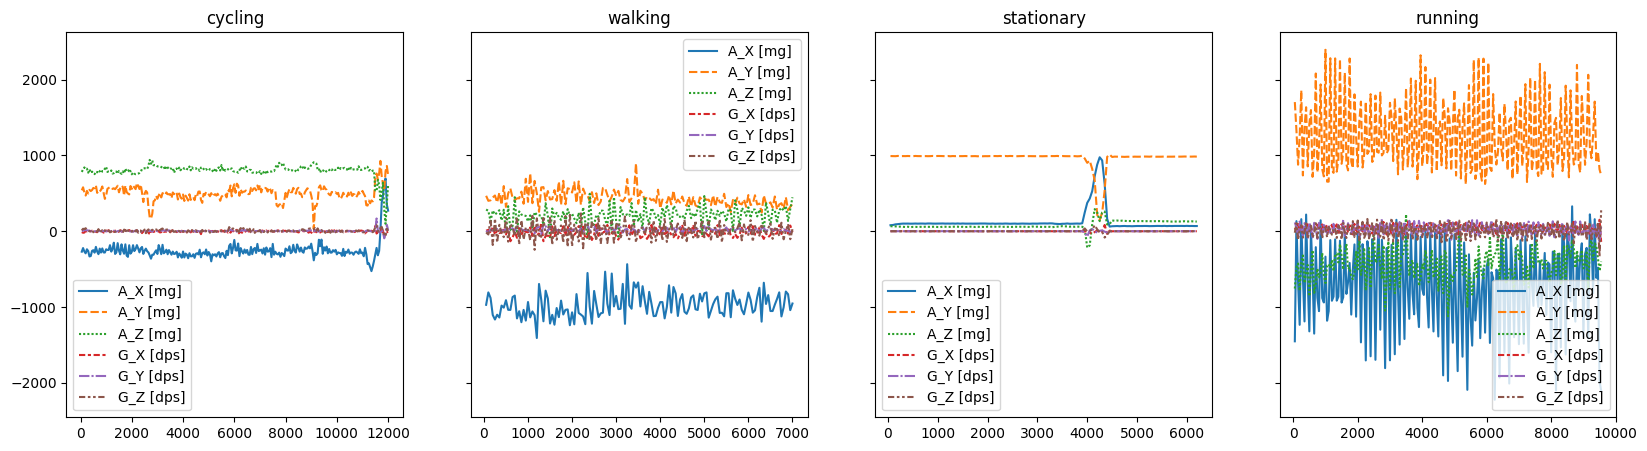

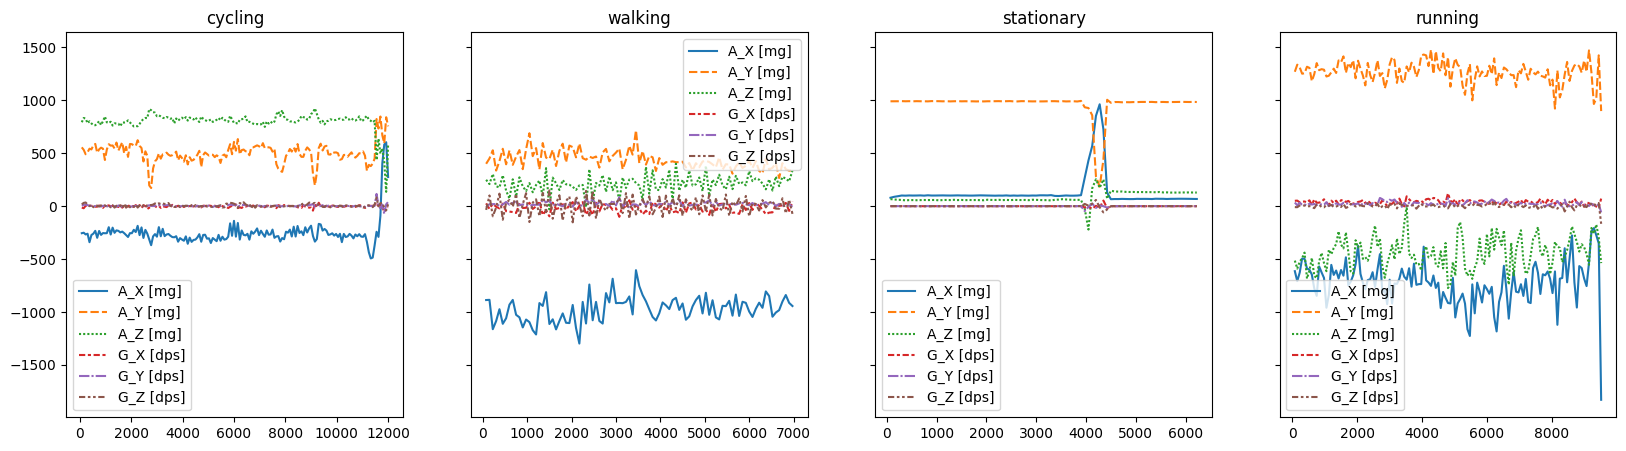

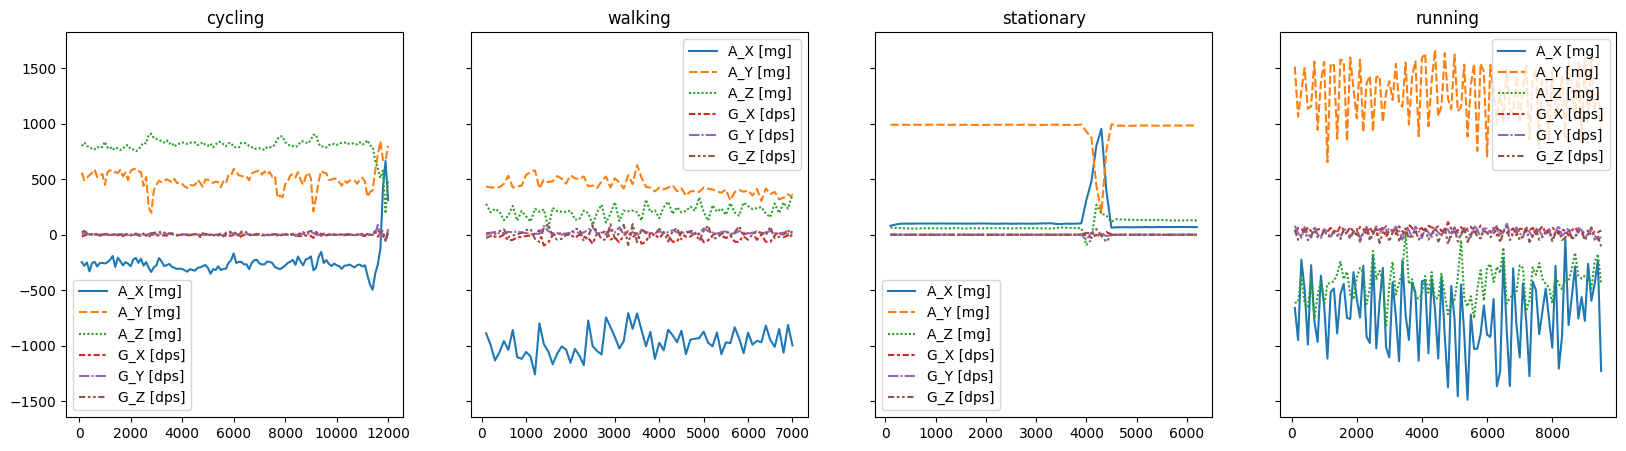

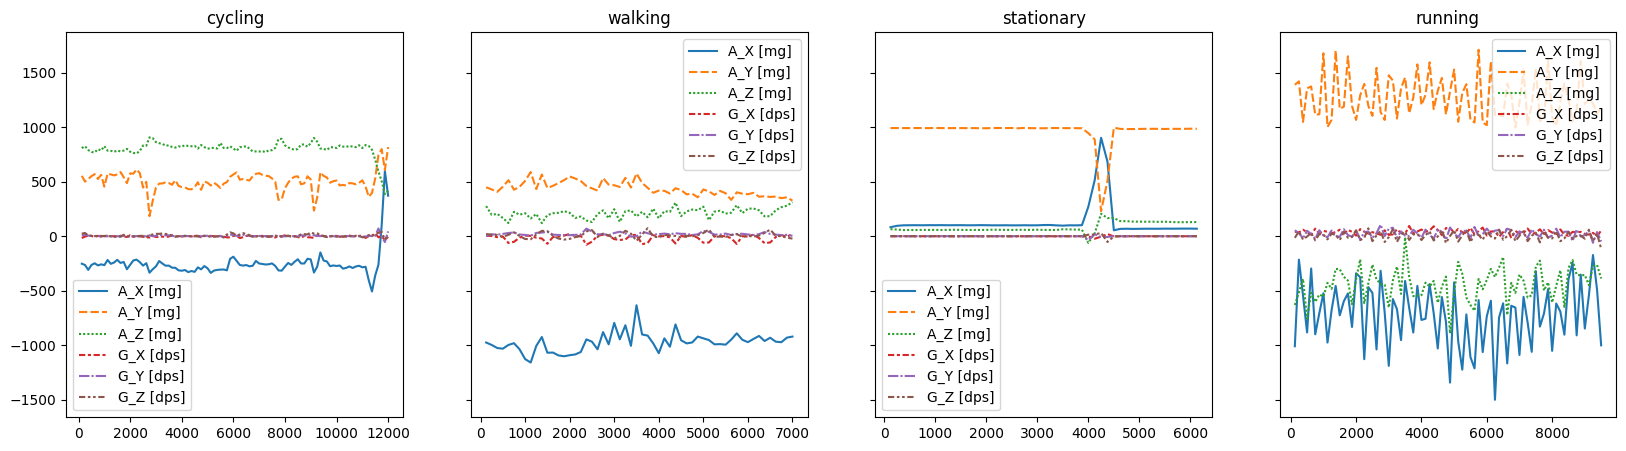

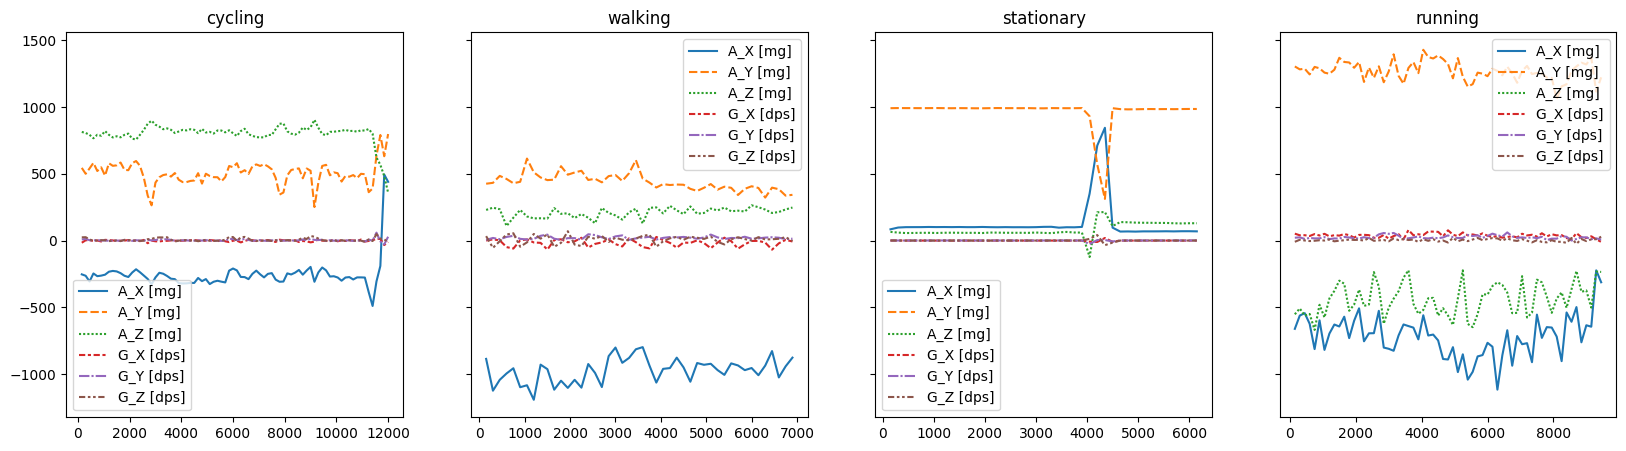

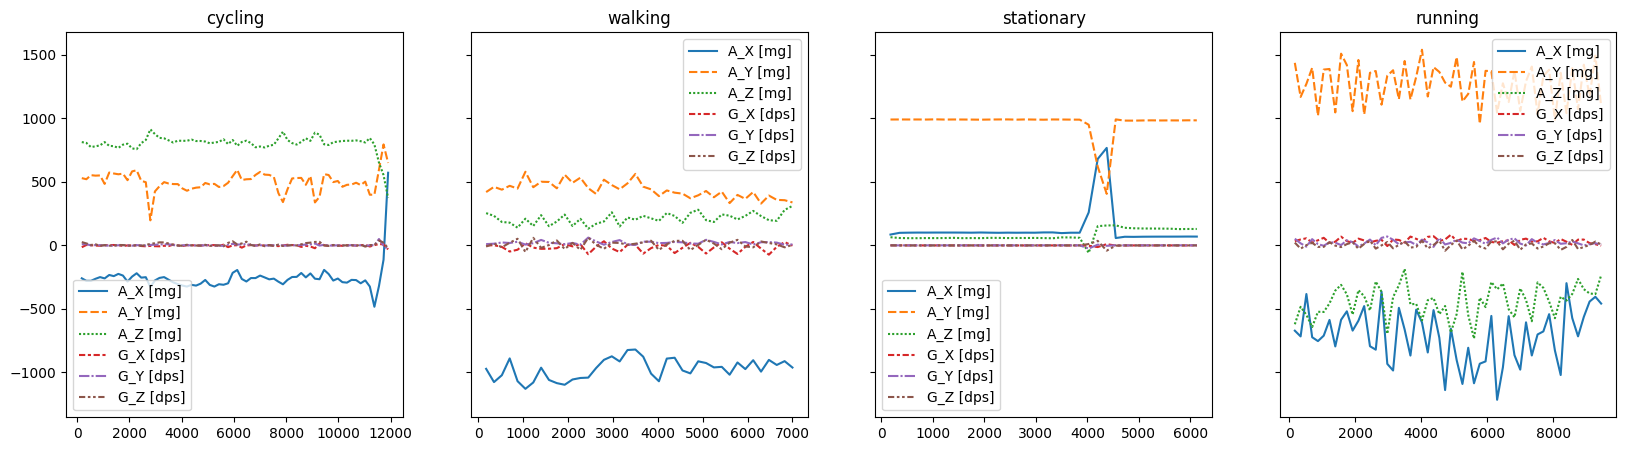

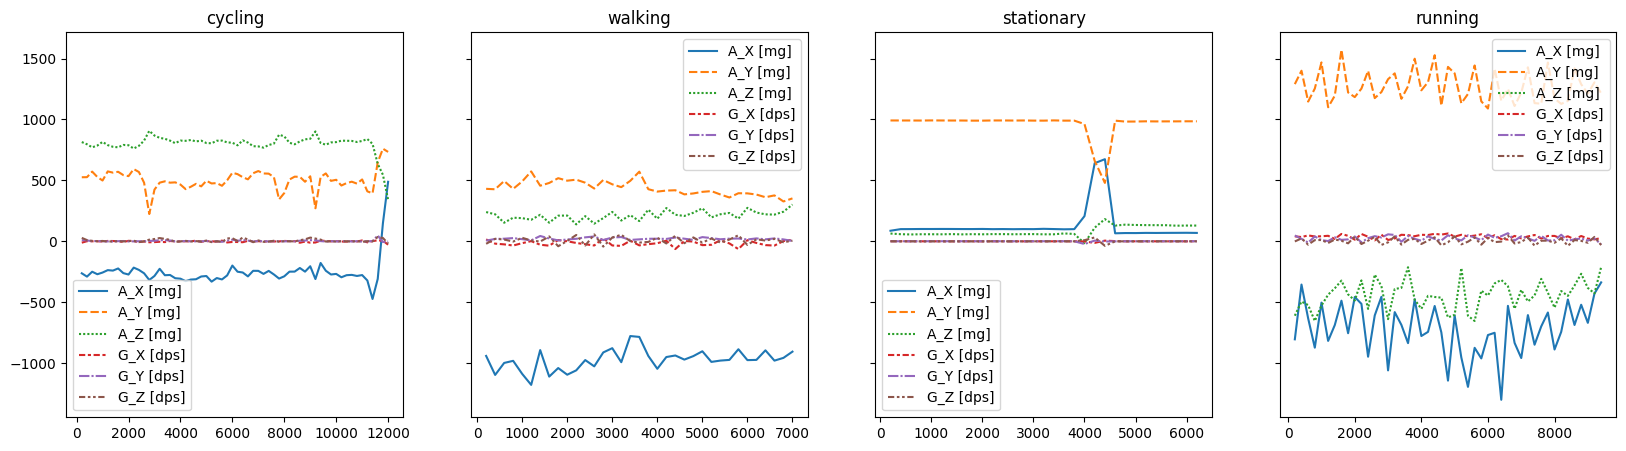

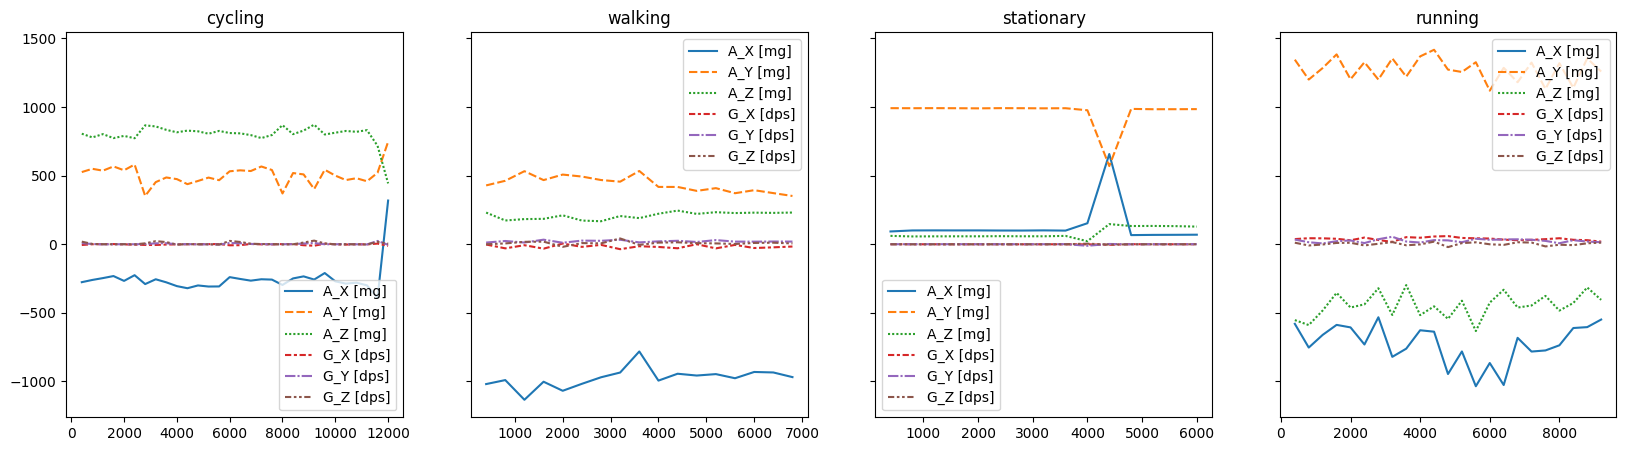

In [29]:
def plot_window_mean(window_size: int, df: pd.DataFrame, ax=None):
    sns.lineplot(df.rolling(window=window_size, step=window_size).mean(), ax=ax)

for window_size in (50, 75, 100, 125, 150, 175, 200, 400):
    plot_for_all_classes(
        partial(plot_window_mean, window_size),
        sample_index=1,
    )

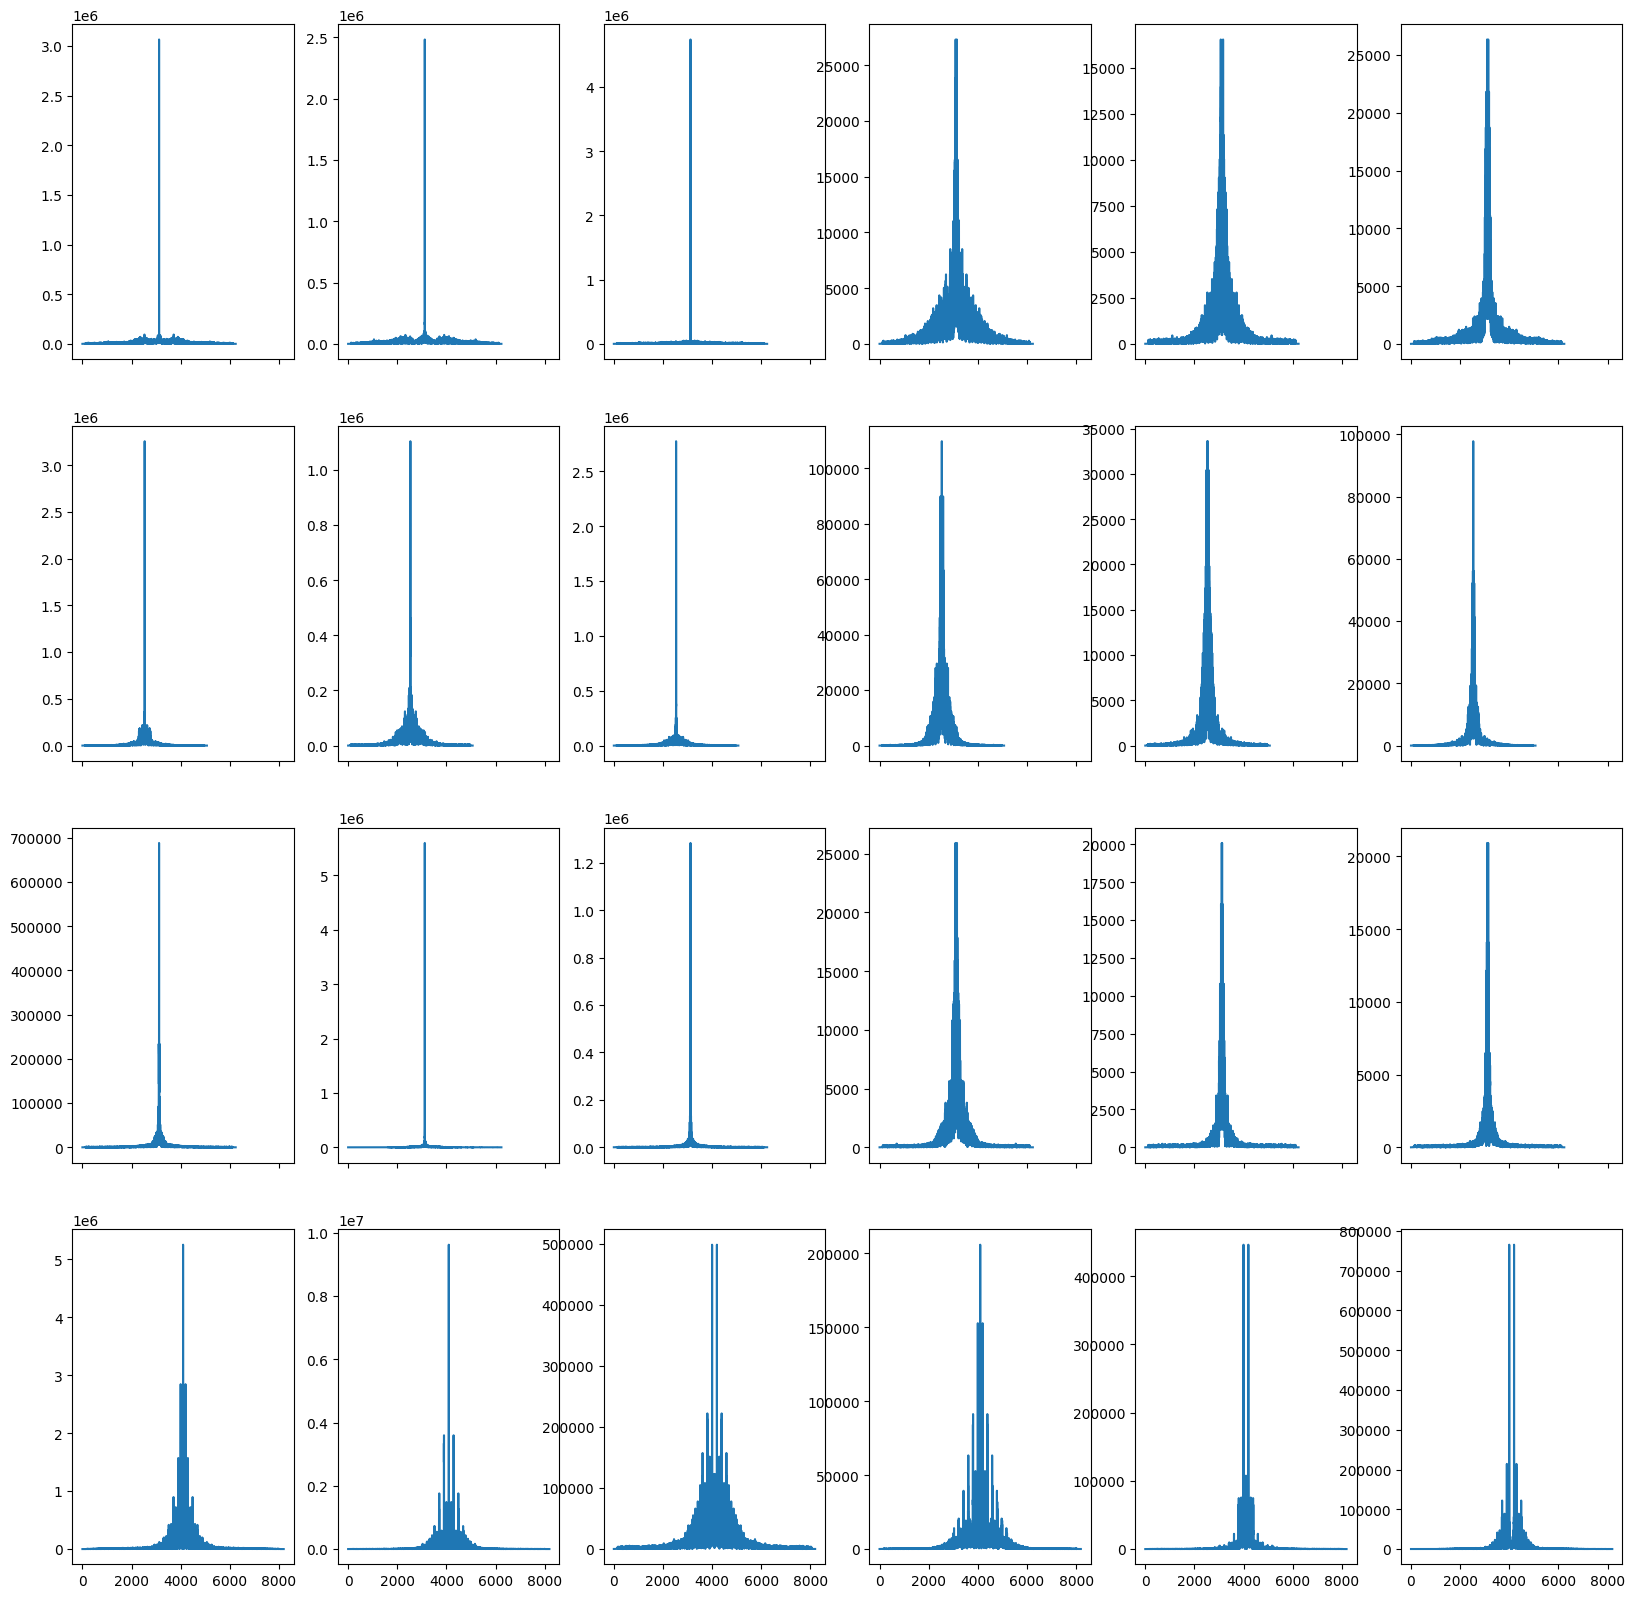

In [25]:
fig, axes = plt.subplots(4, 6, figsize=(20, 20), sharex="col")
for row_axes, (class_, samples) in zip(axes, samples_map.items()):
    sample_df = samples[0]
    for ax, feature_column_name in zip(row_axes, sample_df.iloc[:, :-1]):
        feature_fft = np.abs(np.fft.fftshift(np.fft.fft(sample_df[feature_column_name])))
        sns.lineplot(
            feature_fft,
            ax=ax,
        )

## Distinguishing characteristics

* Cycling and running have high averages for acceleration (especially on the Y axis)
* Walking and running have greater variances for rotational components
* Cycling and running have very distinct frequencies associated with them